# <center><font color=fucshia> SALES PREDICTION BASED ON TV, RADIO AND NEWSPAPER ADVERTISING</center>

<img src ="https://i.pinimg.com/474x/95/2f/7b/952f7bb4f9b139ae50f64f6a6542b492.jpg" width="800">



**In this project, we aim to answer the question: “Which type of advertising -TV, newspaper, or radio - leads to a greater increase in sales?**

**We will determine which advertising method is the most effective.**

#### VARIABLES 

- **TV:** Advertising expenditure on television

- **Radio:** Advertising expenditure on radio

- **Newspaper:** Advertising expenditure on newspaper

- **Sales:** Sales Information

[Dataset Link](https://www.kaggle.com/datasets/thorgodofthunder/tvradionewspaperadvertising)

### IMPORTING PACKAGES & DATA

In [111]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D87D-23AE

 Directory of C:\Users\HP\Documents\Yapay Zeka Kursu\Homework\3- Multiple Linear Regression

04.02.2025  16:52    <DIR>          .
04.02.2025  16:20    <DIR>          ..
04.02.2025  16:23    <DIR>          .ipynb_checkpoints
04.02.2025  16:20             4.063 advertising.csv
04.02.2025  16:37            23.963 media.jpg
04.02.2025  16:35            18.340 media.webp
04.02.2025  16:52             1.772 Project 3 -  Multiple Linear Regression.ipynb
               4 File(s)         48.138 bytes
               3 Dir(s)  330.263.003.136 bytes free


In [5]:
pwd

'C:\\Users\\HP\\Documents\\Yapay Zeka Kursu\\Homework\\3- Multiple Linear Regression'

In [6]:
df = pd.read_csv("advertising.csv")

## <font color="purple">EDA - Explotary Data Analysis

In [7]:
df.head() # The first 5 rows (observations) in data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.tail() # The last 5 rows in data 

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
df.sample(10) # Randomly 10 samples

,TV,Radio,Newspaper,Sales
29,70.6,16.0,40.8,10.5
160,172.5,18.1,30.7,14.4
161,85.7,35.8,49.3,13.3
71,109.8,14.3,31.7,12.4
129,59.6,12.0,43.1,9.7
107,90.4,0.3,23.2,8.7
176,248.4,30.2,20.3,20.2
45,175.1,22.5,31.5,14.9
133,219.8,33.5,45.1,19.6
67,139.3,14.5,10.2,13.4


In [10]:
df.info() # Missing values and variable types information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.shape # There are totally 200 rows (observations) and 4 columns (variables) in data 

(200, 4)

In [12]:
df.describe() # Descriptive Statistics For The Variables : number of observations

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**The table above contains the following values of every variables relatively : Means, standard deviations, minimum values, Q1, Q2, Q3 and maximum values of variables relatively.**

In [13]:
df.isnull().sum() # Is any missing value available?

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**There is not any missing value in data.**

### <font color="purple">CORRELATION ANALYSIS

In [14]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**The approximate correlation values between the target variable Sales and the independent variables TV, Radio, and Newspaper, respectively: 0.78, 0.57, 0.23. This means that there are strong and meaningful relationship between the target variable Sales and independent variables respectively. Correlation value must be more than or equal to 0.2 for meaningful and significant relationship between two variables.**

In [15]:
# In order to see the correlation values clearly and to order the numbers from smallest to largest:

abs(df.corr(numeric_only=True)["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

**Independent variables with correlation values in the range [0.20, 0.90] can be included in the prediction model.**

**Thus All independent variables in data can be included in the prediction model.**

### <font color=purple> EDA - Visualization

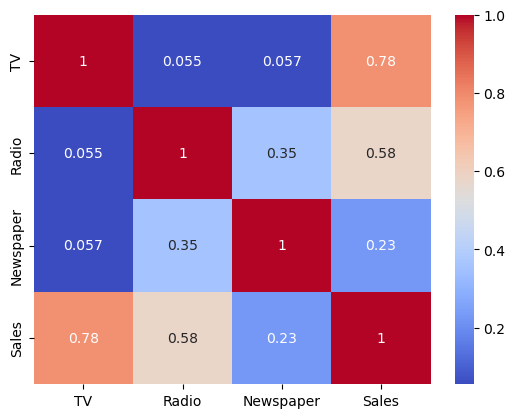

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm"); # Correlation Heatmap

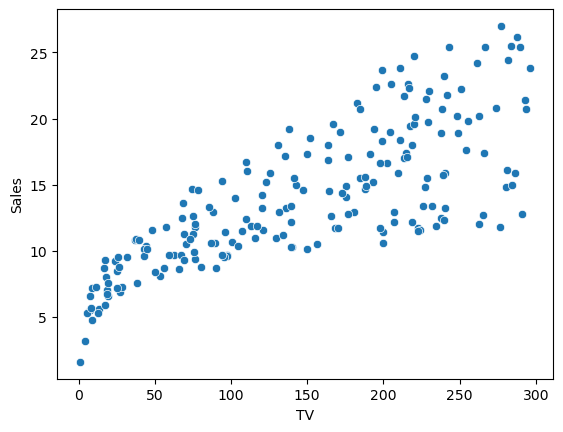

In [24]:
sns.scatterplot(x="TV", y="Sales", data=df); # Scatter Plot for The Distribution of TV and Sales Variables

**According to the plot, there is a near-linear relationship between the two variables.**

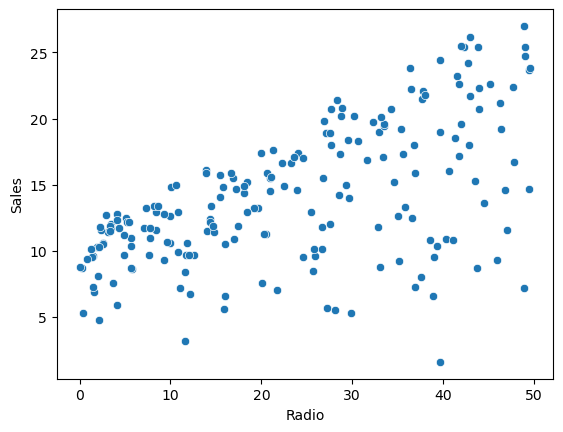

In [28]:
sns.scatterplot(x="Radio", y="Sales", data=df); # Scatter Plot for The Distribution of Radio and Sales Variables 

**According to the plot above, there is a near-linear relationship between the two variables.**

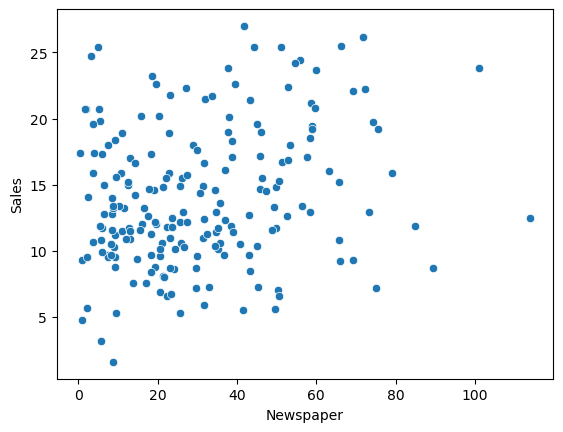

In [26]:
sns.scatterplot(x="Newspaper", y="Sales", data=df); # Scatter Plot For The Distribution of Newspaper and Sales

**According to the plot above, there is a near-linear relationship between the two variables.**

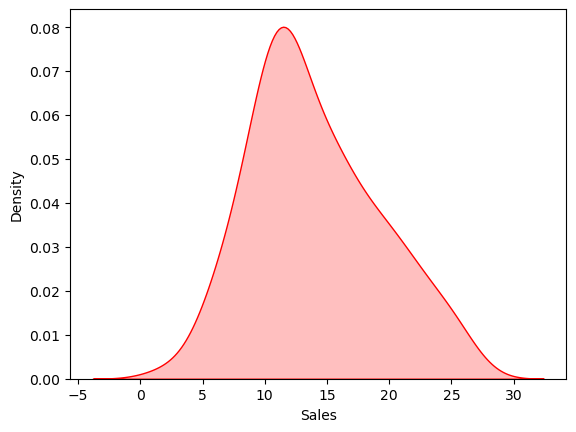

In [35]:
sns.kdeplot(x=df["Sales"], fill=True, color="red");

# The values of target variable Sales have a near-normal distribution. 

### t-Test

The correlation value between Newspaper and Sales is almost 0.23.
So, there is not a much powerful relationship between  newspaper adds and sales.
The correlation value of 0.23 is sufficient to include the independent variable.
However, We can verify these relationships by doing t-test.
Hypothesis for t-Test:
    
    H0 = There is not a meaningful relationship between Newspaper and Sales.
    
    H1 = There is a meaningful relationship between Newspaper and Sales (to reject H0)



In [31]:
_,p = ttest_ind(df["Sales"], df["Newspaper"]) # t-Test

In [33]:
p<0.05 # Is p-value less than 0.05?

True

**p<0.05  H0 is rejected and H1 is accepted.**

### <font color="purple">OUTLIERS

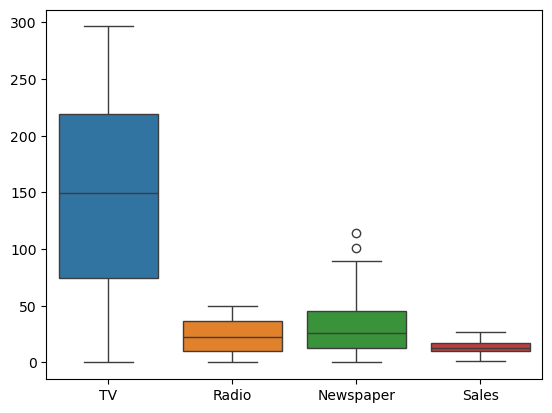

In [37]:
sns.boxplot([df["TV"],df["Radio"], df["Newspaper"], df["Sales"]]); # BOX PLOTS FOR EVERY VARIABLES

**When we look at the box-plots, we can see that there are two outliers in the Newspaper variable.**

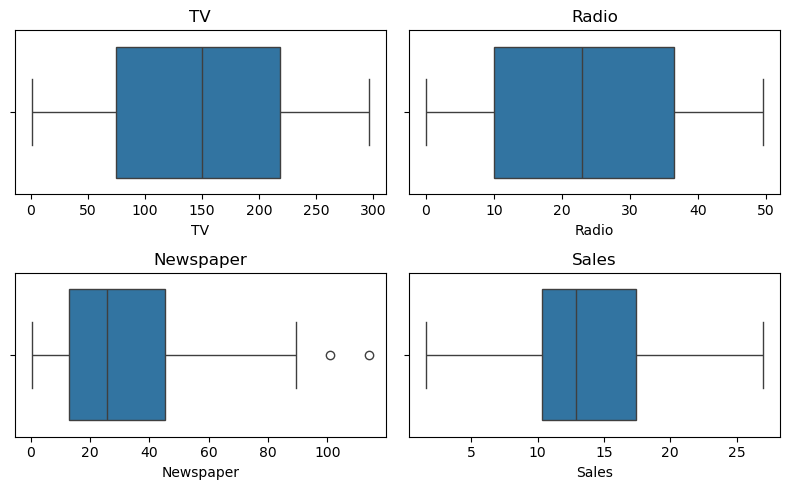

In [113]:
# BOXPLOTS WITH A DIFFERENT VISUALIZATION METHOD:

fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.boxplot(ax=axs[0, 0], x=df['TV'])
axs[0, 0].set_title('TV')


sns.boxplot(ax=axs[0, 1], x=df['Radio'])
axs[0, 1].set_title('Radio')

sns.boxplot(ax=axs[1, 0], x=df["Newspaper"])
axs[1, 0].set_title('Newspaper')

sns.boxplot(ax=axs[1, 1], x=df['Sales'])
axs[1, 1].set_title('Sales')

plt.tight_layout()
plt.show()


**We can see again that there are two outliers in the Newspaper variable. The distribution of values in Newspaper is right-skewed. In other words, the majority of the values are greater than the average value.**

### Outliers Determination by Using Quintiles (Q1, Q2, Q3)

In [118]:
# Quantiles:
Q3 = df["Newspaper"].mean() + 3 * df["Newspaper"].std() # Third Quantile
Q1 = df["Newspaper"].mean() - 3 * df["Newspaper"].std() # First Quantile

In [122]:
df[(df["Newspaper"] < Q1) | (df["Newspaper"] > Q3)]["Newspaper"] 
# the values less than Q1 OR the values more than Q3 --> OUTLIERS


16     114.0
101    100.9
Name: Newspaper, dtype: float64

**The 16th observation and the 101th observation are the outliers in Newspaper**

### <font color=purple> TEST & TRAIN

In [43]:
y=df["Sales"] # Target Variable
x=df.drop("Sales", axis=1) # Independent Variables

In [45]:
# We split the data into training and test sets using an 80%–20% ratio for the dependent and independent variables:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [46]:
x_train.shape, x_test.shape # Number of rows and columns in test and train sets

((160, 3), (40, 3))

### <font color=purple> MODELLING
    
#### **- LINEER REGRESSION MODEL**

In [48]:
# Model 

lr = LinearRegression()

In [49]:
# Fitting - Training Model

model = lr.fit(x_train, y_train)

In [50]:
# y_Prediction

tahmin = model.predict(x_test) # predictions for target varaible in test set

#### - RIDGE MODEL

In [53]:
R = Ridge() # Ridge Model Function

In [54]:
Rmodel = R.fit(x_train, y_train) # Ridge Model Fitting

In [55]:
tahmin2 = Rmodel.predict(x_test) # y_predictions

#### - LASSO MODEL

In [57]:
L= Lasso() # Lasso Model Function

In [58]:
Lmodel = L.fit(x_train, y_train) # Lasso Model Training with train sets 

In [59]:
tahmin3 = Lmodel.predict(x_test) # y_predictions

#### - ELASTIC NET MODEL

In [60]:
E= ElasticNet() # Elastic Net Model Function

In [61]:
Emodel = E.fit(x_train, y_train) # Elastic Model Training

In [62]:
tahmin4 = Emodel.predict(x_test) #y_predictions 

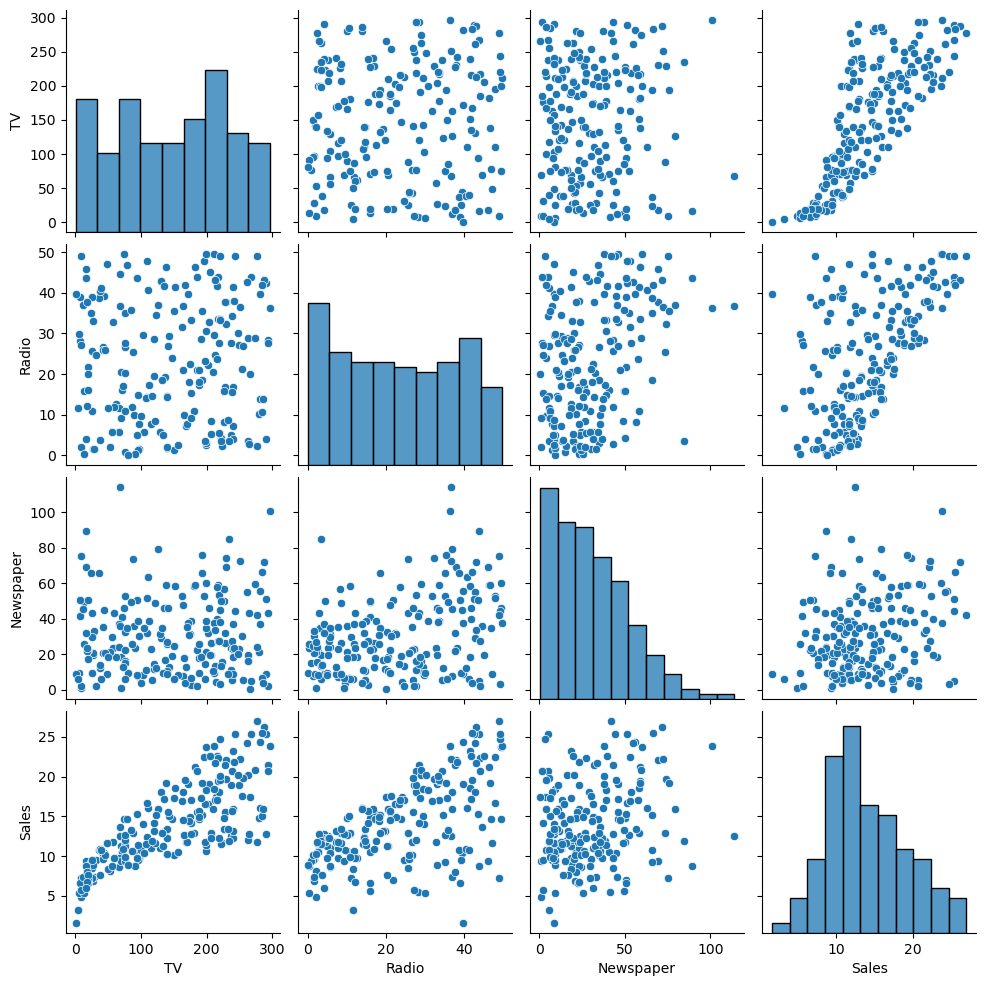

In [64]:
sns.pairplot(df);

**When we look at the relationships between the independent variables and the target variable, no obvious linear relationship is observed.**

**Therefore it is understood that nonlinear models are more useful than linear models for this data.**

### <font color=purple> Nonlinear Models:

#### - DECISION TREE

In [66]:
dt = DecisionTreeRegressor()

In [67]:
Dmodel = dt.fit(x_train, y_train)

In [68]:
tahmin5 = Dmodel.predict(x_test)

#### - EXTRA DECISION TREES

In [71]:
ET = ExtraTreesRegressor()

In [72]:
ETModel =ET.fit(x_train, y_train)

In [73]:
tahmin6 = ETModel.predict(x_test)

#### - GRADIENT BOOSTING 

In [77]:
GBR = GradientBoostingRegressor()

In [78]:
GBRModel = GBR.fit(x_train, y_train)

In [79]:
tahmin7 = GBRModel.predict(x_test)

#### - K-NEIGHBORS 

In [85]:
kn = KNeighborsRegressor()

In [86]:
knModel = kn.fit(x_train, y_train)

In [87]:
tahmin8 = knModel.predict(x_test)

#### - XGB

In [88]:
xgb = XGBRegressor()

In [89]:
xgbModel = xgb.fit(x_train, y_train)

In [90]:
tahmin9 = xgbModel.predict(x_test)

### <font color=purple> COMPARING NONLINEAR MODELS

In [104]:

def algo_test(x, y):
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    ETR = ExtraTreesRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    
    algos = [L, R, Lass, E, ETR, GBR, kn, dt, xgb]
    
    algo_names = ["Linear", "Ridge", "Lasso", "Elastic Net", "Extra Trees", "Gradient Boosting", "K-Neighbors", 
                  "Decision Tree", "XGB"]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
    
    # Create the empty lists to display the models' performance metrics
    R2_score = []
    RMSE = []
    MAE = []
    
    # Dataframe for results
    result = pd.DataFrame(columns = ["R2_score", "RMSE", "MAE"], index=algo_names)
    
    for algo in algos: 
        # Model training and predicting 
        p = algo.fit(x_train, y_train).predict(x_test)
        
        # Calculate the metrics for every models
        R2_score.append(r2_score(y_test, p))
        RMSE.append(mean_squared_error(y_test, p)**0.5)
        MAE.append(mean_absolute_error(y_test, p))
    
    # Add the results to the Dataframe named result
    result['R2_score'] = R2_score
    result['RMSE'] = RMSE
    result['MAE'] = MAE
    
    # for the greatest R^2 score, run the model 
    result_sorted = result.sort_values("R2_score", ascending=False)
    
    return result_sorted


In [105]:
algo_test(x,y) # Prediction Performance Metrics of All Trained Models 

,R2_score,RMSE,MAE
Extra Trees,0.989840,0.566296,0.432100
Gradient Boosting,0.983898,0.712906,0.607931
XGB,0.972470,0.932166,0.725829
Decision Tree,0.931670,1.468588,1.017500
K-Neighbors,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
Elastic Net,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
Linear,0.899438,1.781600,1.460757


#### Model Performance Evaluation with R^2, RMSE and MAE metrics:

_(R^2_score should be > 0.85 and the metrics of RMSE and MAE should be minimum)_

**- R2_score for the Extra Trees model is rougly 0.99 . The greatest R^2 score belongs to this model. In other words The best prediction performance is observed on The Extra Trees model. However, the other model performances are also successful.**

**- The lowest RMSE score belongs to Extra Trees model**

**- The lowest MAE score belongs Extra Trees model**


#### <font color= dark red> THE WINNER MODEL --> EXTRA TREES REGRESSION MODEL

### <font color=purple> ARE THE RESIDUALS OF THE TARGET VARIABLE ON LINEAR AND THE EXTRA TREES MODELS NORMALLY DISTRIBUTED?

In [123]:
residuals_linear= tahmin -y_test # y_prediction - y_real_values

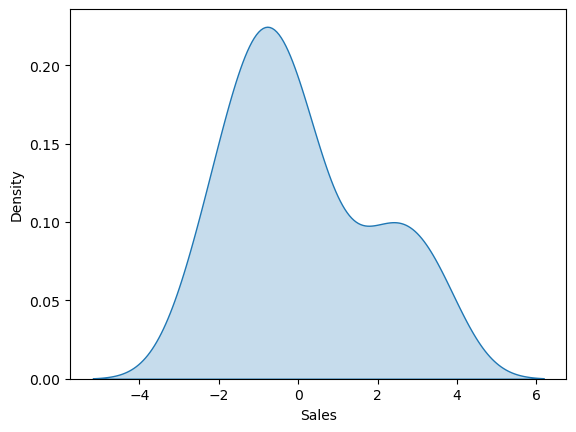

In [131]:
sns.kdeplot(x=residuals_linear, fill=True); # The Normal Distribution Graph of The Residuals on The Linear Model

In [132]:
residuals_extra= tahmin6 - y_test 

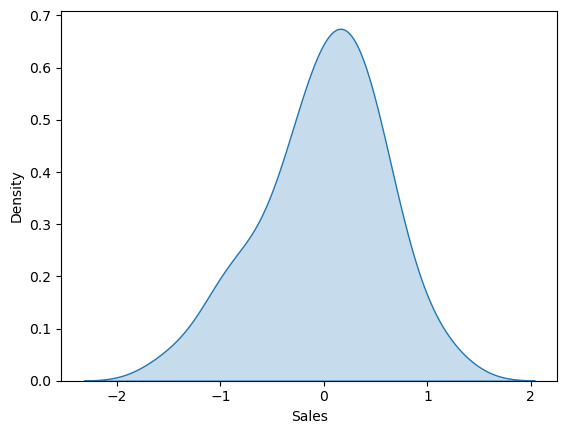

In [134]:
sns.kdeplot(residuals_extra, fill=True); # The Normal Distribution Graph of The Residuals on The Extra Trees Model

**The Disstribution of The Extra Trees Regression Model's residuals is more normal than the Linear Model's.**

**This means that the residuals of the model are indipendent from each others and this is aimed in regression analysis.**

### <font color =purple> The Coefficients of The Independent Variablesfor The Linear Models
    
    (Independent Variables: TV, Radio, Newspaper)

In [135]:
lr.coef_ # Coefficients on The Linear Regression Model

array([0.04472952, 0.18919505, 0.00276111])

In [136]:
R.coef_ # Coefficients on The Ridge Model

array([0.04472953, 0.18918869, 0.00276287])

In [137]:
L.coef_ # Coefficients on The Lasso Modell

array([0.04463068, 0.18535048, 0.00142196])

In [138]:
E.coef_ # Coefficients on The Elastic Net Model

array([0.04468109, 0.1867688 , 0.00223112])

**The independent variable which has the biggest coefficient is the most effective variable on the model. For the every model, The most effective variable is "Radio". So , To invest on radio adds has the biggest role on the increase of sells.**

### <font color=purple> COMPARISON OF THE EXTRA TREES PREDICTIONS & THE TRUE VALUES

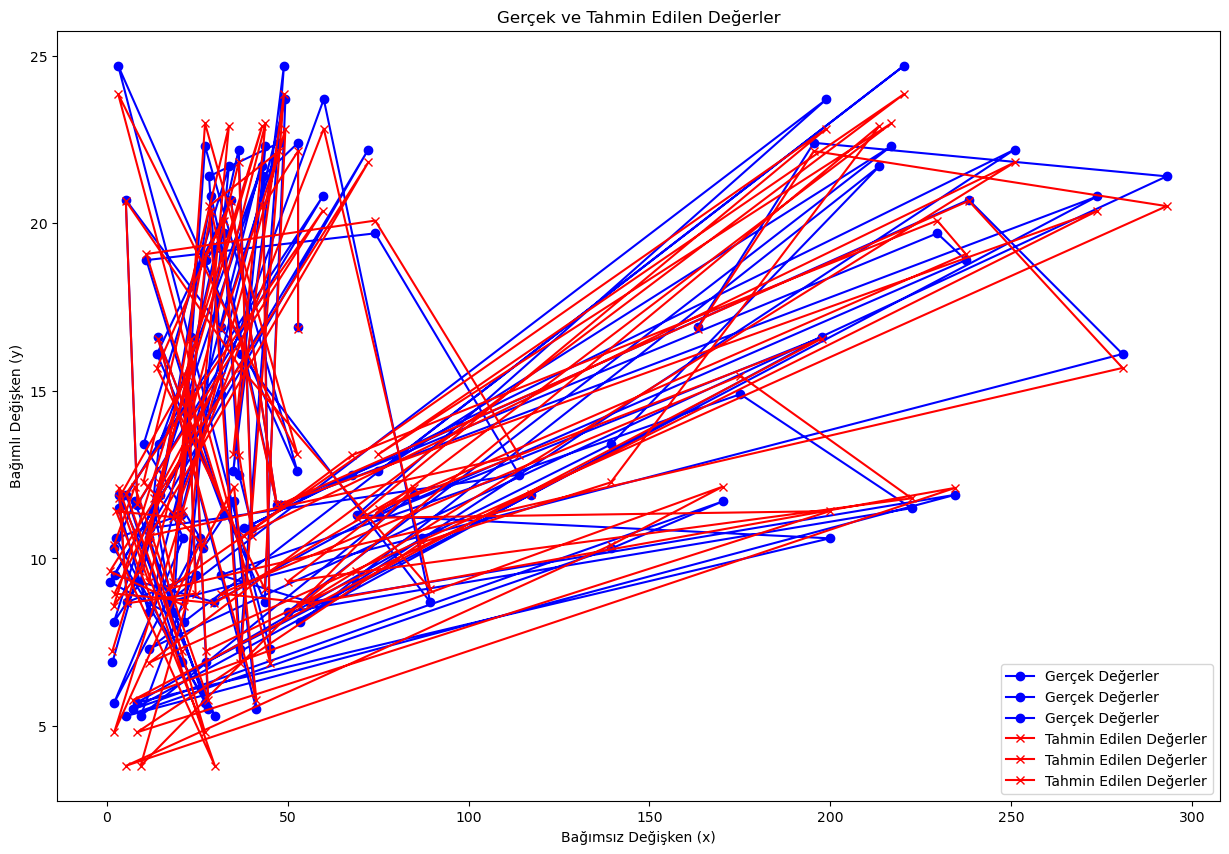

In [145]:
# Show the true and the prediction values on the same graph
plt.figure(figsize=(15,10))

# Draw the true_y_test values
plt.plot(x_test, y_test, label='True Values', color='blue', linestyle='-', marker='o')

# Draw the predict_test values 
plt.plot(x_test, tahmin6, label='Prediction Values', color='red', linestyle='-', marker='x')

# Labeling the graph 
plt.title('True and Prediction Values')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Target Variable (y)')
plt.legend()

# Show the graph 
plt.show()

**According to the graph, the prediction values and the true values are incredibly close to each others. It means that model predictions are successful.**